<a href="https://colab.research.google.com/github/christiangarza1505813/PCD/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar una imagen en modo BGR
img = cv2.imread('/content/pulmon_normal.jpg')
pulmon_antracosis = cv2.imread('/content/pulmon_antracosis.jpg')

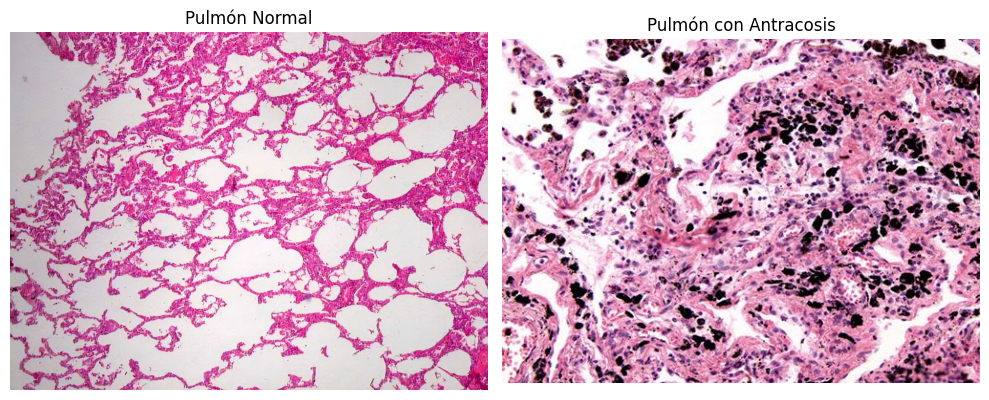

In [35]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar una imagen en modo BGR
img = cv2.imread('/content/pulmon_normal.jpg')
pulmon_antracosis = cv2.imread('/content/pulmon_antracosis.jpg')

# Convertir de BGR a RGB para matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pulmon_antracosis_rgb = cv2.cvtColor(pulmon_antracosis, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes sin ejes y con títulos
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Pulmón Normal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pulmon_antracosis_rgb)
plt.title('Pulmón con Antracosis')
plt.axis('off')

plt.tight_layout()
plt.show()


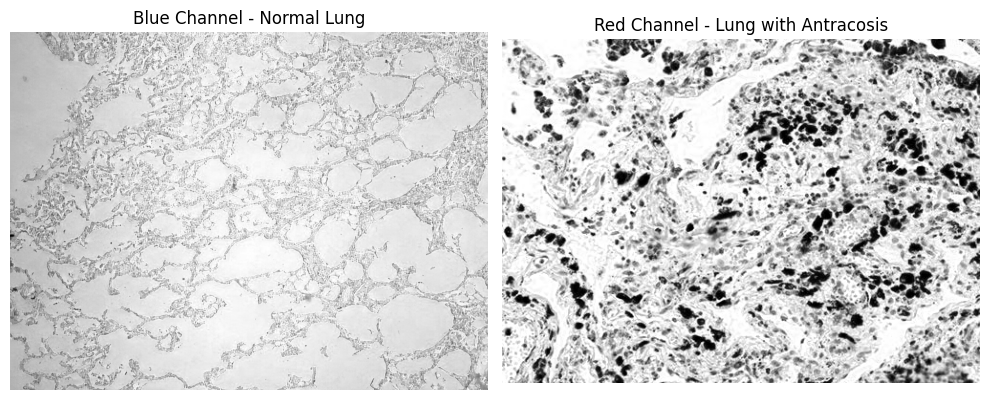

In [47]:

import matplotlib.pyplot as plt
# Split the images into their B, G, R components
B, G, R = cv2.split(img_rgb)
B_a, G_a, R_a = cv2.split(pulmon_antracosis_rgb)

# Now you have the individual color channels (B, G, R) for both images.
# You can further process or display them as needed.  For example:

# Display the blue channel of the first image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(B, cmap='gray') # Display as grayscale
plt.title('Blue Channel - Normal Lung')
plt.axis('off')



# Display the red channel of the second image
#plt.figure(figsize=(5,5))
plt.subplot(1, 2, 2)
plt.imshow(B_a, cmap='gray') # Display as grayscale
plt.title('Red Channel - Lung with Antracosis')
plt.axis('off')

plt.tight_layout()
plt.show()

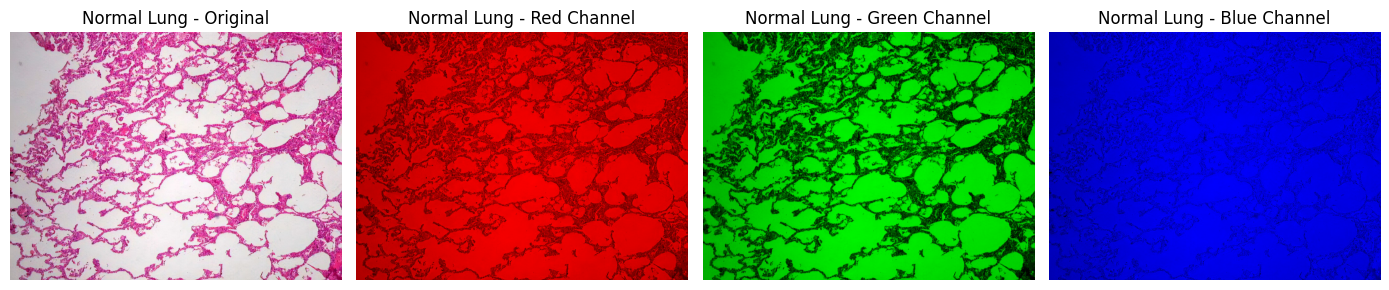

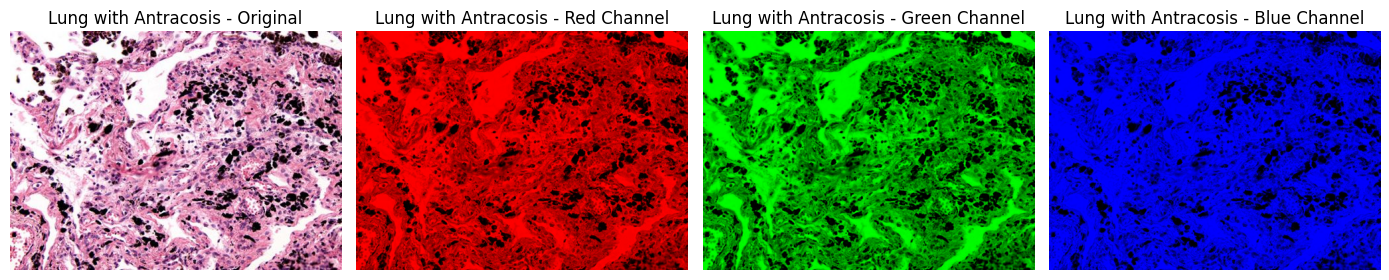

In [51]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_image_channels(image_path, title):
  # Load the image
  img = cv2.imread(image_path)
  if img is None:
    print(f"Error: Could not load image at {image_path}")
    return

  # Convert from BGR to RGB
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Split the image into B, G, R components
  B, G, R = cv2.split(img_rgb)

  # Create images for each channel
  zeros = np.zeros(img.shape[:2], dtype="uint8")
  img_red = cv2.merge([R, zeros, zeros])
  img_green = cv2.merge([zeros, G, zeros])
  img_blue = cv2.merge([zeros, zeros, B])

  # Display the images
  plt.figure(figsize=(14, 6))

  plt.subplot(1, 4, 1)
  plt.imshow(img_rgb)
  plt.title(f'{title} - Original')
  plt.axis('off')

  plt.subplot(1, 4, 2)
  plt.imshow(img_red)
  plt.title(f'{title} - Red Channel')
  plt.axis('off')

  plt.subplot(1, 4, 3)
  plt.imshow(img_green)
  plt.title(f'{title} - Green Channel')
  plt.axis('off')

  plt.subplot(1, 4, 4)
  plt.imshow(img_blue)
  plt.title(f'{title} - Blue Channel')
  plt.axis('off')

  plt.tight_layout()
  plt.show()


# Call the function for each image
show_image_channels('/content/pulmon_normal.jpg', 'Normal Lung')
show_image_channels('/content/pulmon_antracosis.jpg', 'Lung with Antracosis')


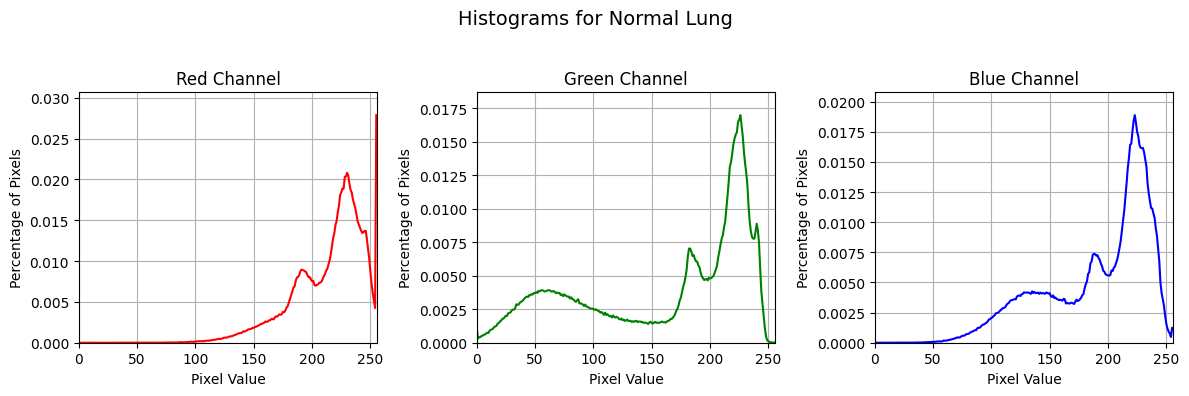

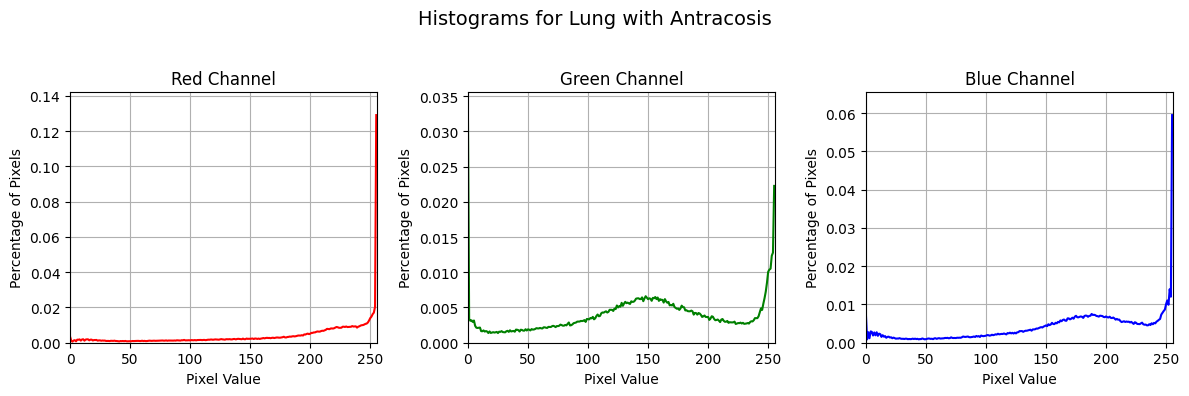

In [60]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_histograms(image_path, title):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    colors = ['red', 'green', 'blue']
    channels = cv2.split(img_rgb)

    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Histograms for {title}', fontsize=14)

    for i, (channel, color) in enumerate(zip(channels, colors)):
        hist, bins = np.histogram(channel.flatten(), 256, [0, 256])
        hist_percent = (hist / hist.sum())   # Calculate percentage

        plt.subplot(1, 3, i + 1)
        plt.plot(bins[:-1], hist_percent, color=color)
        plt.xlim([0, 256])
        plt.ylim([0, hist_percent.max() * 1.1]) # Adjust y-axis limit for better visualization
        plt.xlabel('Pixel Value')
        plt.ylabel('Percentage of Pixels')
        plt.title(f'{color.capitalize()} Channel')
        plt.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to accommodate suptitle
    plt.show()


# Call the function for each image
show_histograms('/content/pulmon_normal.jpg', 'Normal Lung')
show_histograms('/content/pulmon_antracosis.jpg', 'Lung with Antracosis')


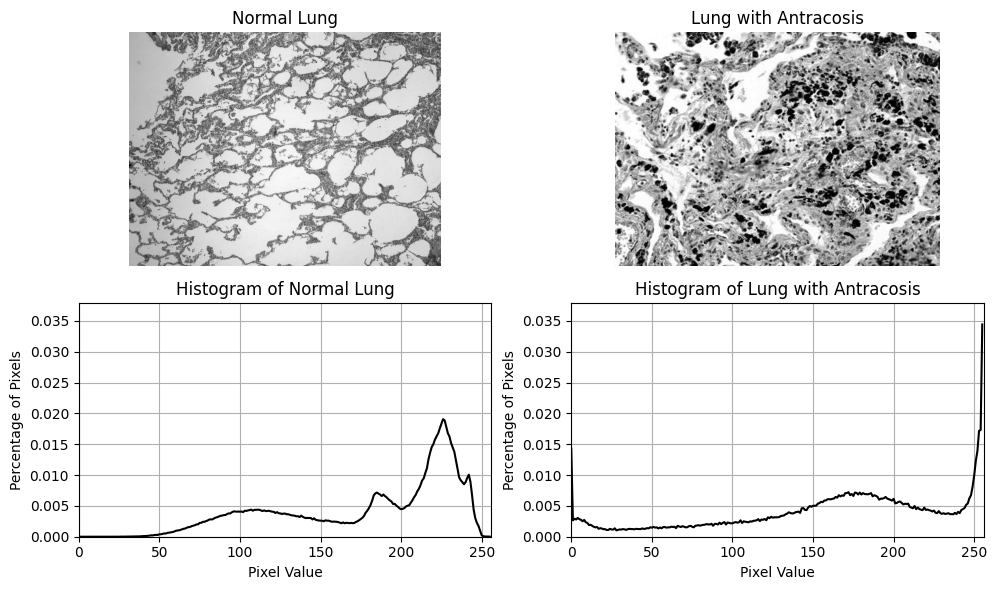

In [74]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_grayscale_histograms(image_path1, title1, image_path2, title2):
    # Cargar imágenes en escala de grises
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    if img1 is None or img2 is None:
        print("Error: Could not load one or both images.")
        return

    # Calcular histogramas
    hist1, bins1 = np.histogram(img1.flatten(), 256, [0, 256])
    hist2, bins2 = np.histogram(img2.flatten(), 256, [0, 256])

    # Normalizar histogramas en porcentaje
    hist1_percent = hist1 / hist1.sum()
    hist2_percent = hist2 / hist2.sum()

    # Crear una figura con 2 columnas (imágenes) y 2 filas (imágenes + histogramas)
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))

    # Mostrar imágenes
    axes[0, 0].imshow(img1, cmap='gray')
    axes[0, 0].set_title(title1)
    axes[0, 0].axis('off')

    axes[0, 1].imshow(img2, cmap='gray')
    axes[0, 1].set_title(title2)
    axes[0, 1].axis('off')

    # Mostrar histogramas
    axes[1, 0].plot(bins1[:-1], hist1_percent, color='black')
    axes[1, 0].set_xlim([0, 256])
    axes[1, 0].set_ylim([0, max(hist1_percent.max(), hist2_percent.max()) * 1.1])
    axes[1, 0].set_xlabel('Pixel Value')
    axes[1, 0].set_ylabel('Percentage of Pixels')
    axes[1, 0].set_title(f'Histogram of {title1}')
    axes[1, 0].grid(True)

    axes[1, 1].plot(bins2[:-1], hist2_percent, color='black')
    axes[1, 1].set_xlim([0, 256])
    axes[1, 1].set_ylim([0, max(hist1_percent.max(), hist2_percent.max()) * 1.1])
    axes[1, 1].set_xlabel('Pixel Value')
    axes[1, 1].set_ylabel('Percentage of Pixels')
    axes[1, 1].set_title(f'Histogram of {title2}')
    axes[1, 1].grid(True)

    # Ajustar diseño para evitar superposición
    plt.tight_layout()
    plt.show()

# Llamar a la función para comparar ambas imágenes
show_grayscale_histograms('/content/pulmon_normal.jpg', 'Normal Lung',
                          '/content/pulmon_antracosis.jpg', 'Lung with Antracosis')


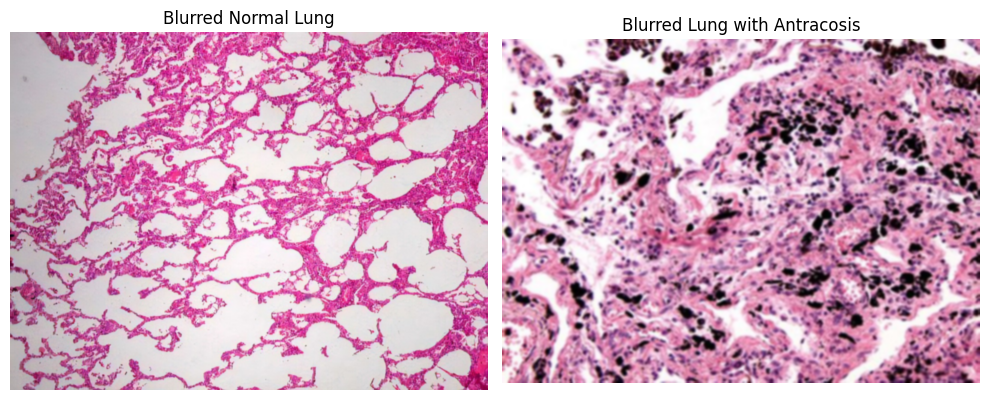

In [75]:

import cv2
import matplotlib.pyplot as plt

# Apply Gaussian blur to both images
blurred_img = cv2.GaussianBlur(img_rgb, (5, 5), 0)  # Adjust kernel size (5, 5) as needed
blurred_antracosis = cv2.GaussianBlur(pulmon_antracosis_rgb, (5, 5), 0)

# Display the blurred images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(blurred_img)
plt.title('Blurred Normal Lung')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_antracosis)
plt.title('Blurred Lung with Antracosis')
plt.axis('off')

plt.tight_layout()
plt.show()


Características de textura para Pulmón Normal:
🔹 Contraste: 2138.9225
🔹 Homogeneidad: 0.1338
🔹 Energía: 0.0233
🔹 Disimilitud: 27.0503

Características de textura para Pulmón con Antracosis:
🔹 Contraste: 4274.7162
🔹 Homogeneidad: 0.0542
🔹 Energía: 0.0170
🔹 Disimilitud: 46.4263



<ipython-input-85-9dc8cc6e357d>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(["Pulmón Normal", "Pulmón con Antracosis"], rotation=20)
<ipython-input-85-9dc8cc6e357d>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(["Pulmón Normal", "Pulmón con Antracosis"], rotation=20)
<ipython-input-85-9dc8cc6e357d>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(["Pulmón Normal", "Pulmón con Antracosis"], rotation=20)
<ipython-input-85-9dc8cc6e357d>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(["Pulmón Normal", "Pulmón con Antracosis"], rotation=20)


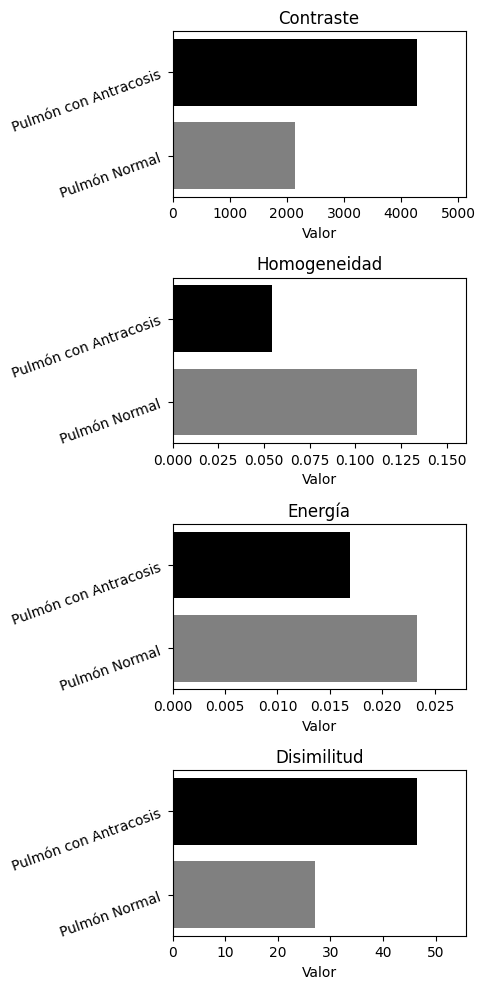

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

def compute_glcm_features(image_path, title):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Cargar imagen en escala de grises
    if img is None:
        print(f"Error: No se pudo cargar la imagen en {image_path}")
        return None
    # Reducir niveles de gris a 8 bits (256 niveles)
    img = cv2.equalizeHist(img)

    # Calcular la matriz de co-ocurrencia de niveles de gris (GLCM)
    distances = [1, 3, 5]  # Distancias de píxeles para evaluar la textura
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Ángulos en radianes
    glcm = graycomatrix(img, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

    # Extraer métricas de textura
    contrast = graycoprops(glcm, 'contrast').mean()
    homogeneity = graycoprops(glcm, 'homogeneity').mean()
    energy = graycoprops(glcm, 'energy').mean()
    dissimilarity = graycoprops(glcm, 'dissimilarity').mean()

    # Mostrar resultados
    print(f"Características de textura para {title}:")
    print(f"🔹 Contraste: {contrast:.4f}")
    print(f"🔹 Homogeneidad: {homogeneity:.4f}")
    print(f"🔹 Energía: {energy:.4f}")
    print(f"🔹 Disimilitud: {dissimilarity:.4f}\n")

    return contrast, homogeneity, energy, dissimilarity

# Evaluar ambas imágenes
features_normal = compute_glcm_features('/content/pulmon_normal.jpg', 'Pulmón Normal')
features_antracosis = compute_glcm_features('/content/pulmon_antracosis.jpg', 'Pulmón con Antracosis')

# Comparación en gráfico de barras
if features_normal and features_antracosis:
    labels = ["Contraste", "Homogeneidad", "Energía", "Disimilitud"]
    normal_values = list(features_normal)
    antracosis_values = list(features_antracosis)

    # Crear figura con 4 subgráficos
    fig, axes = plt.subplots(4, 1, figsize=(5, 10))

    # Iterar sobre cada métrica y graficarla en su propio subplot
    for i, label in enumerate(labels):
        axes[i].barh(["Pulmón Normal", "Pulmón con Antracosis"],
                     [normal_values[i], antracosis_values[i]],
                     color=['grey', 'black'])
        axes[i].set_title(label)
        axes[i].set_xlabel("Valor")
        axes[i].set_yticklabels(["Pulmón Normal", "Pulmón con Antracosis"], rotation=20)

        # Ajustar escala del eje X según cada métrica
        max_val = max(normal_values[i], antracosis_values[i])
        axes[i].set_xlim(0, max_val * 1.2)

    plt.tight_layout()
    plt.show()